# 12.2 Assignment: Term Project
**Name:** Eula Fullerton  
**Due Date:** Nov 16, 2024  
**Class:** DSC530-T302 Data Exploration and Analysis  
**Professor:** Professor Metzger 

## Question and Hypothesis:

- Question: "How do mental health disorder rates compare across countries, and is there a trend in these rates over time?"
- Hypothesis: "There is considerable variability across countries, with certain nations experiencing higher rates due to socieconmic conditions, healthcare access, and cultural attitudes toward mental health"

## Dataset Link:
https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder

## Step 1: Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

## Step 2: Loading the Data

In [9]:
# Load the CSV file
df = pd.read_csv("Mental health Depression disorder Data.csv")

C:\Users\samue\AppData\Local\Temp\ipykernel_29152\1871906829.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Mental health Depression disorder Data.csv")


## Step 3: Inspect Data

In [12]:
# Display the first few rows to verify it's loaded correctly
print(df.head())

   index       Entity Code  Year Schizophrenia (%) Bipolar disorder (%)  \
0      0  Afghanistan  AFG  1990           0.16056             0.697779   
1      1  Afghanistan  AFG  1991          0.160312             0.697961   
2      2  Afghanistan  AFG  1992          0.160135             0.698107   
3      3  Afghanistan  AFG  1993          0.160037             0.698257   
4      4  Afghanistan  AFG  1994          0.160022             0.698469   

  Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0             0.101855               4.828830                1.677082   
1             0.099313               4.829740                1.684746   
2             0.096692               4.831108                1.694334   
3             0.094336               4.830864                1.705320   
4             0.092439               4.829423                1.716069   

   Depression (%)  Alcohol use disorders (%)  
0        4.071831                   0.672404  
1        4.07953

In [14]:
# Display the shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

Dataset shape: (108553, 11)


In [16]:
# Display information about each column, including data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB
None


In [18]:
# Display basic statistics of numerical columns
print(df.describe())

               index  Anxiety disorders (%)  Drug use disorders (%)  \
count  108553.000000            6468.000000             6468.000000   
mean    54276.000000               3.989921                0.862278   
std     31336.696223               1.167526                0.460679   
min         0.000000               2.023393                0.383650   
25%     27138.000000               3.188824                0.535064   
50%     54276.000000               3.554373                0.726430   
75%     81414.000000               4.682163                0.940157   
max    108552.000000               8.967330                3.452476   

       Depression (%)  Alcohol use disorders (%)  
count     6468.000000                6468.000000  
mean         3.497654                   1.585821  
std          0.655859                   0.860283  
min          2.139903                   0.446940  
25%          3.005529                   0.993685  
50%          3.499606                   1.479936  
75%

## Step 4: Cleaning Data

By analyzing previous notebooks and data scrubbing, the nature of the data was discovered.  The data set can be separated into 4 tables, which need to be adjusted in order to properly use the data set.

- Table 1: (first 6468 rows) Mental Health Disorder Shares in %
- Table 2: (Rows 6469-54276) Mental Health Disorder Shares per Sex in %
- Table 3: (Rows 54277-102084) Suicide and Depression per 100 k inhabitants
- Table 4: (Rows after 102084) Prevalance - Depressive Disorders per 100 k inhabitants

### a) Splitting the Table

In [22]:
#Splitting tables and naming the headers based on columns
table_1 = df.iloc[:6467]

table_2 = df.iloc[6469:54276]
table_2.columns = df.iloc[6468]
table_2 = table_2.iloc[:,:7].drop(columns = 6468)

table_3 = df.iloc[54277:102084]
table_3.columns = df.iloc[54276]
table_3 = table_3.iloc[:,:7].drop(columns = 54276)

table_4 = df.iloc[102085:]
table_4.columns = df.iloc[102084]
table_4 = table_4.iloc[:,:5].drop(columns = 102084)

### b) Joining the Table

In [25]:
#Joining tables based on entity, code and year for a deeper analysis

# Merge table 1 and 2
Temp1 =pd.merge(table_1, table_2, how='left', on=['Entity', 'Code', 'Year']) 
# Merge Temp1 with Table 3
Temp2 = pd.merge(Temp1, table_3, how='left', on=['Entity', 'Code', 'Year'])
# Merge Temp2 with Table 4
joined_df = pd.merge(Temp2, table_4, how='left', on=['Entity', 'Code', 'Year'])
joined_df.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population_x,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population_y,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,4.647815,12412000.000000,10.318504,4039.755763,12412000.000000,318435.81367
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,4.655772,13299000.000000,10.32701,4046.256034,13299000.000000,329044.773956
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,4.662066,14486000.000000,10.271411,4053.709902,14486000.000000,382544.572895
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,4.669012,15817000.000000,10.376123,4060.203474,15817000.000000,440381.507393
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,4.67305,17076000.000000,10.575915,4062.290365,17076000.000000,456916.645489


In [27]:
# drop the duplicated population and the ones with null
joined_df = joined_df.drop(columns=['Population_y', 'Code', 'index']).rename(columns={'Population_x' : 'Population'}).dropna()

In [29]:
# Check new data frame
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5543 entries, 0 to 6466
Data columns (total 15 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   Entity                                                                                                     5543 non-null   object 
 1   Year                                                                                                       5543 non-null   object 
 2   Schizophrenia (%)                                                                                          5543 non-null   object 
 3   Bipolar disorder (%)                                                                                       5543 non-null   object 
 4   Eating disorders (%)                                                         

In [31]:
# Check if there are any missing values
joined_df.isna().sum()

Entity                                                                                                       0
Year                                                                                                         0
Schizophrenia (%)                                                                                            0
Bipolar disorder (%)                                                                                         0
Eating disorders (%)                                                                                         0
Anxiety disorders (%)                                                                                        0
Drug use disorders (%)                                                                                       0
Depression (%)                                                                                               0
Alcohol use disorders (%)                                                                                    0
P

In [33]:
# Change type for description
joined_df = joined_df.astype({'Year': 'object', 
                              'Schizophrenia (%)': 'float64', 
                              'Bipolar disorder (%)' : 'float64', 
                              'Eating disorders (%)' : 'float64', 
                              'Prevalence in males (%)' : 'float64', 
                              'Prevalence in females (%)' : 'float64', 
                              'Population' : 'float64', 
                              'Suicide rate (deaths per 100,000 individuals)' : 'float', 
                              'Depressive disorder rates (number suffering per 100,000)' : 'float', 
                              'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)' : 'float64' })

In [35]:
# Save New Table
Mental_Data = joined_df.to_csv('MentalData.csv', index=False)

## Step 5: Checking the Cleaned Data

In [38]:
df = pd.read_csv('MentalData.csv')
df.describe()

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
count,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5.543000e+03,5543.000000,5543.000000,5.543000e+03
mean,2003.497564,0.208859,0.715117,0.234781,3.956686,0.842590,3.479098,1.562500,2.798747,4.130418,6.671254e+07,12.003097,3336.295362,2.251392e+06
std,8.077169,0.042752,0.164819,0.154880,1.145874,0.460717,0.674144,0.858704,0.551204,0.863457,4.735780e+08,8.350929,636.448186,1.599779e+07
min,1990.000000,0.146902,0.314535,0.073908,2.023393,0.383650,2.139903,0.446940,1.594129,2.348094,4.500000e+04,1.526792,2065.451870,9.307216e+02
25%,1996.500000,0.180022,0.615266,0.121456,3.182905,0.525429,2.958612,0.964655,2.398376,3.494231,1.805500e+06,6.514930,2843.097061,5.477068e+04
50%,2003.000000,0.198637,0.693311,0.180381,3.515414,0.711570,3.461686,1.466786,2.751691,4.159879,7.077000e+06,10.342299,3327.060171,1.982941e+05
75%,2010.000000,0.231320,0.827835,0.281217,4.663629,0.907990,3.883689,1.860187,3.118282,4.595792,2.264300e+07,14.908441,3725.166808,6.514706e+05
max,2017.000000,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668,4.905163,8.537801,7.547859e+09,98.831696,6096.437594,2.644556e+08


## Step 6: Data Exploration and Analysis

In [41]:
print(df.columns)

Index(['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)',
       'Prevalence in males (%)', 'Prevalence in females (%)', 'Population',
       'Suicide rate (deaths per 100,000 individuals)',
       'Depressive disorder rates (number suffering per 100,000)',
       'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'],
      dtype='object')


### Variables

1. Year: Year that the data was collected
2. Entity: Unique identifier for each country or region included in the data set.
3. % Schizophrenia: Percentage of people with schizophrenia in that country/region during that year.
4. % Bipolar Disorder: Percentage of people with bipolar disorder in that country/region during that year.
5. % Eating Disorders: Percentage of people with bipolar disorder in that country/region during that year.
6. % Anxiety Disorders: Percentage of people with anxiety disorders in that country/region during that year.
7. % Drug Use Disorders: Percentage of people with drug use disorders in that country/region during that year.
8. % Depression Disorders: Percentage of people with depression in that country/region during that year. 
9. % Alcohol Use disorders: Percentage of people with alcohol use disorders in that country/region during that year

### Overall Picture (descriptive statistics with boxplots)

       Schizophrenia (%)  Bipolar disorder (%)  Eating disorders (%)  \
count        5543.000000           5543.000000           5543.000000   
mean            0.208859              0.715117              0.234781   
std             0.042752              0.164819              0.154880   
min             0.146902              0.314535              0.073908   
25%             0.180022              0.615266              0.121456   
50%             0.198637              0.693311              0.180381   
75%             0.231320              0.827835              0.281217   
max             0.375110              1.206597              0.943991   

       Anxiety disorders (%)  Drug use disorders (%)  Depression (%)  \
count            5543.000000             5543.000000     5543.000000   
mean                3.956686                0.842590        3.479098   
std                 1.145874                0.460717        0.674144   
min                 2.023393                0.383650        2.1

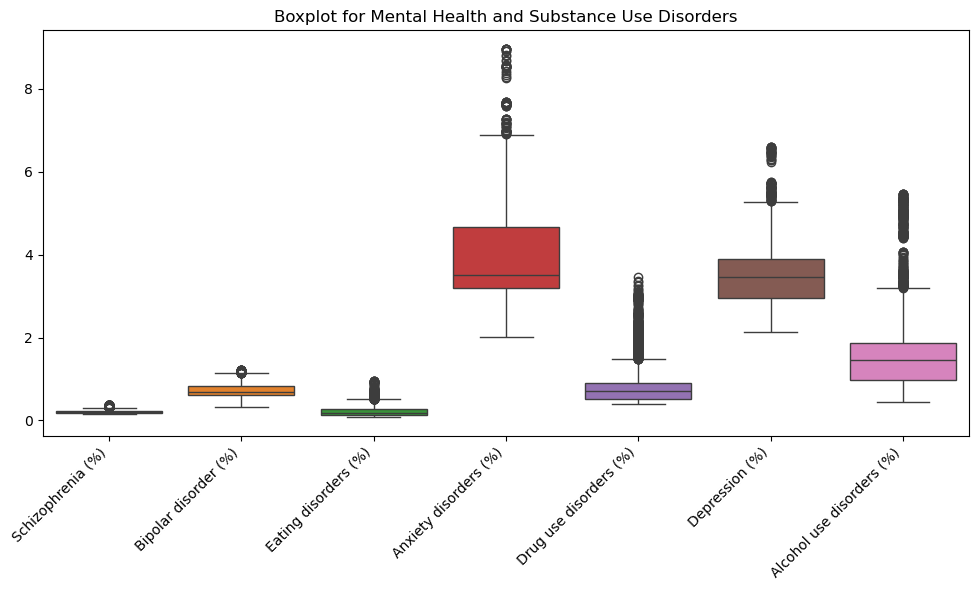

In [46]:
# List of variables to describe and plot
variables = ['Schizophrenia (%)', 'Bipolar disorder (%)', 
             'Eating disorders (%)', 'Anxiety disorders (%)', 
             'Drug use disorders (%)', 'Depression (%)', 
             'Alcohol use disorders (%)']

# Use .describe() to get summary statistics
summary_stats = df[variables].describe()
print(summary_stats)

# Create a boxplot for the variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[variables])
plt.title('Boxplot for Mental Health and Substance Use Disorders')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

### a) Histograms

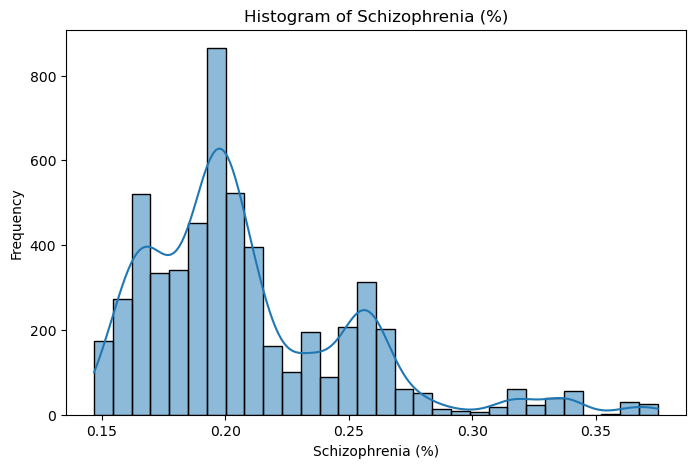

Outliers for Schizophrenia (%):
      Schizophrenia (%)         Entity  Year
252            0.360489      Australia  1990
253            0.361196      Australia  1991
254            0.361893      Australia  1992
255            0.362524      Australia  1993
256            0.363001      Australia  1994
...                 ...            ...   ...
5259           0.336404  United States  2013
5260           0.335860  United States  2014
5261           0.335243  United States  2015
5262           0.334578  United States  2016
5263           0.333890  United States  2017

[252 rows x 3 columns]
Schizophrenia (%) - Mean: 0.21, Std Dev: 0.04
IQR-based outlier threshold: Lower = 0.10, Upper = 0.31




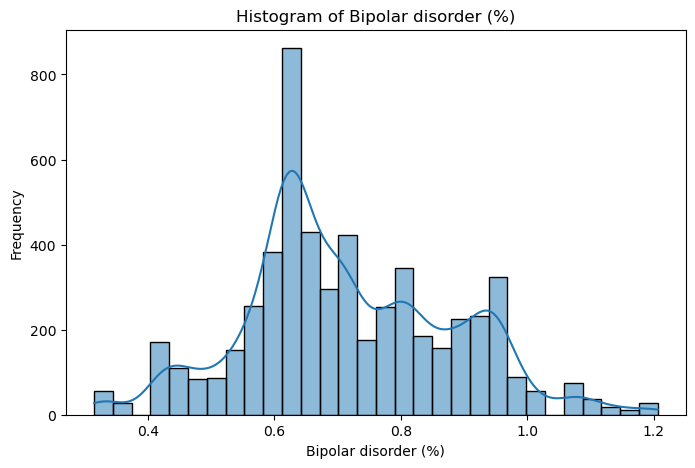

Outliers for Bipolar disorder (%):
      Bipolar disorder (%)       Entity  Year
264               1.147003    Australia  2002
265               1.148158    Australia  2003
266               1.149127    Australia  2004
267               1.149604    Australia  2005
268               1.149700    Australia  2006
269               1.149731    Australia  2007
270               1.149689    Australia  2008
271               1.149596    Australia  2009
272               1.149425    Australia  2010
273               1.149079    Australia  2011
274               1.148473    Australia  2012
275               1.147593    Australia  2013
3444              1.192302  New Zealand  1990
3445              1.192343  New Zealand  1991
3446              1.192371  New Zealand  1992
3447              1.192441  New Zealand  1993
3448              1.192496  New Zealand  1994
3449              1.192593  New Zealand  1995
3450              1.192744  New Zealand  1996
3451              1.192879  New Zealand  1997

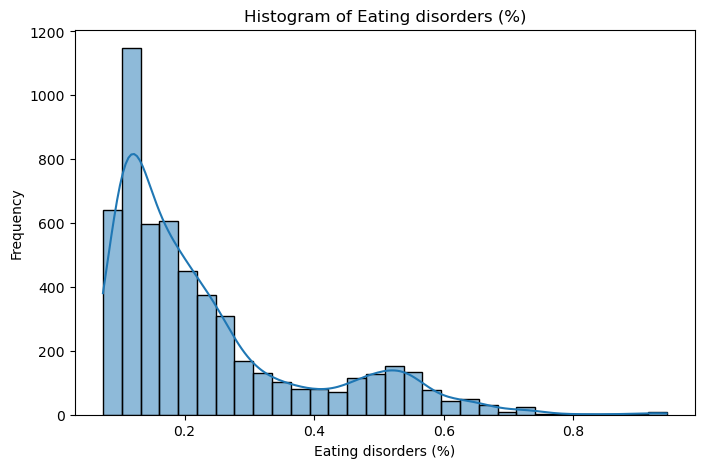

Outliers for Eating disorders (%):
      Eating disorders (%)         Entity  Year
112               0.585917        Andorra  1990
113               0.580843        Andorra  1991
114               0.579633        Andorra  1992
115               0.578331        Andorra  1993
116               0.580882        Andorra  1994
...                    ...            ...   ...
5257              0.533199  United States  2011
5258              0.531514  United States  2012
5259              0.528946  United States  2013
5260              0.525990  United States  2014
5261              0.522109  United States  2015

[478 rows x 3 columns]
Eating disorders (%) - Mean: 0.23, Std Dev: 0.15
IQR-based outlier threshold: Lower = -0.12, Upper = 0.52




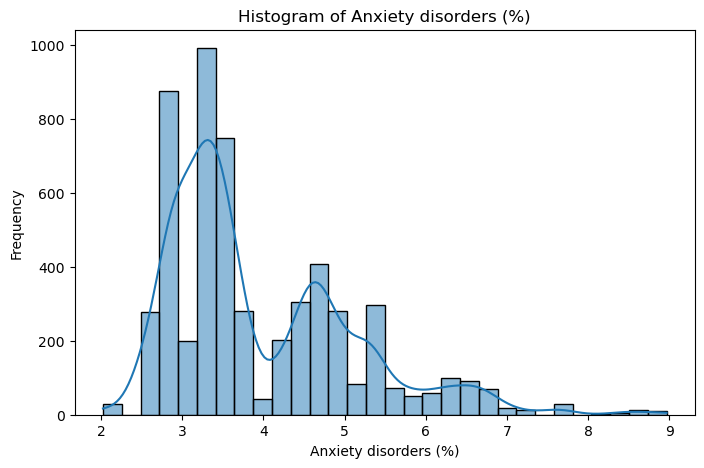

Outliers for Anxiety disorders (%):
      Anxiety disorders (%)         Entity  Year
2284               6.905036           Iran  2006
2285               6.980793           Iran  2007
2286               7.068564           Iran  2008
2287               7.141882           Iran  2009
2288               7.174615           Iran  2010
...                     ...            ...   ...
5248               6.971891  United States  2002
5249               6.970935  United States  2003
5250               6.968875  United States  2004
5251               6.965249  United States  2005
5252               6.937038  United States  2006

[87 rows x 3 columns]
Anxiety disorders (%) - Mean: 3.96, Std Dev: 1.15
IQR-based outlier threshold: Lower = 0.96, Upper = 6.88




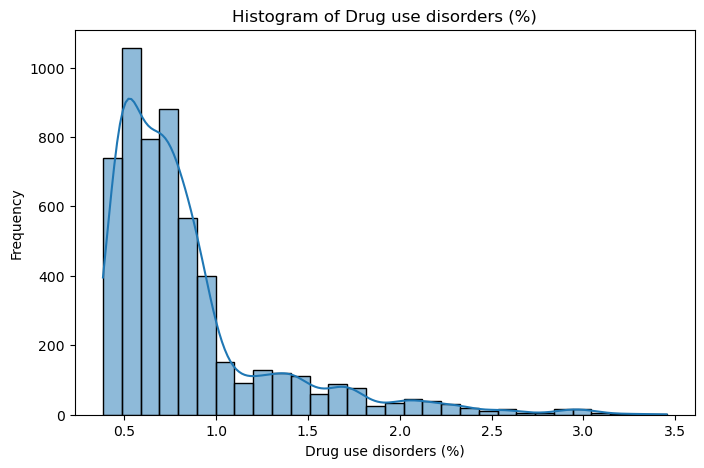

Outliers for Drug use disorders (%):
      Drug use disorders (%)         Entity  Year
0                   1.677082    Afghanistan  1990
1                   1.684746    Afghanistan  1991
2                   1.694334    Afghanistan  1992
3                   1.705320    Afghanistan  1993
4                   1.716069    Afghanistan  1994
...                      ...            ...   ...
5259                3.110712  United States  2013
5260                3.181115  United States  2014
5261                3.262674  United States  2015
5262                3.353142  United States  2016
5263                3.452476  United States  2017

[520 rows x 3 columns]
Drug use disorders (%) - Mean: 0.84, Std Dev: 0.46
IQR-based outlier threshold: Lower = -0.05, Upper = 1.48




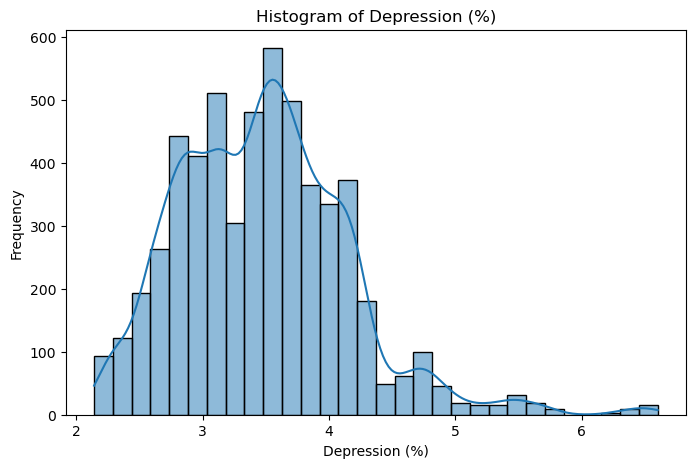

Outliers for Depression (%):
      Depression (%)   Entity  Year
1680        5.427329  Finland  1990
1681        5.461775  Finland  1991
1682        5.486011  Finland  1992
1683        5.504764  Finland  1993
1684        5.512826  Finland  1994
...              ...      ...   ...
5138        5.427879   Uganda  2004
5139        5.413234   Uganda  2005
5140        5.388014   Uganda  2006
5141        5.341410   Uganda  2007
5142        5.283417   Uganda  2008

[99 rows x 3 columns]
Depression (%) - Mean: 3.48, Std Dev: 0.67
IQR-based outlier threshold: Lower = 1.57, Upper = 5.27




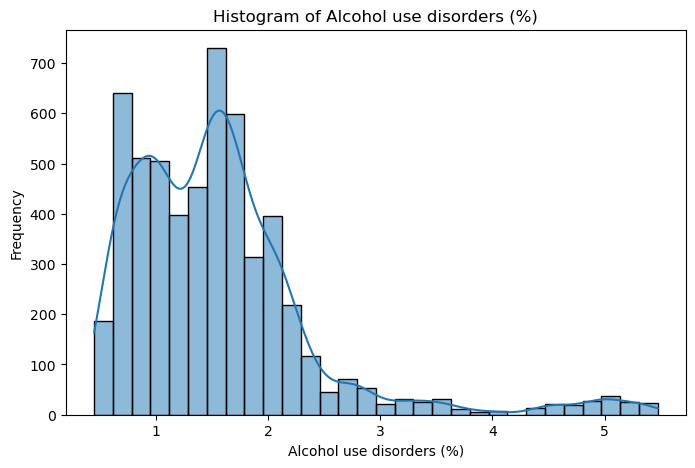

Outliers for Alcohol use disorders (%):
      Alcohol use disorders (%)   Entity  Year
448                    4.795118  Belarus  1990
449                    4.889664  Belarus  1991
450                    4.977548  Belarus  1992
451                    5.054909  Belarus  1993
452                    5.117567  Belarus  1994
...                         ...      ...   ...
5175                   4.923653  Ukraine  2013
5176                   4.880967  Ukraine  2014
5177                   4.826954  Ukraine  2015
5178                   4.762349  Ukraine  2016
5179                   4.686883  Ukraine  2017

[271 rows x 3 columns]
Alcohol use disorders (%) - Mean: 1.56, Std Dev: 0.86
IQR-based outlier threshold: Lower = -0.38, Upper = 3.20




In [49]:
# List of mental health disorder columns with updated names
variables = [
    'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 
    'Anxiety disorders (%)', 'Drug use disorders (%)', 
    'Depression (%)', 'Alcohol use disorders (%)'
]

# Step 1: Plot histograms for each variable
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(f'{var}')
    plt.ylabel('Frequency')
    plt.show()

    # Step 2: Identify outliers using the IQR method
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"Outliers for {var}:")
    print(outliers[[var, 'Entity', 'Year']])  # Display outliers with country and year for context

    # Summary statistics
    mean = df[var].mean()
    std_dev = df[var].std()
    print(f"{var} - Mean: {mean:.2f}, Std Dev: {std_dev:.2f}")
    print(f"IQR-based outlier threshold: Lower = {lower_bound:.2f}, Upper = {upper_bound:.2f}")
    print("\n")

## b) Outliers

Due to the nature of the project with the purpose of global comparisons and trend analysis. Outliers were kept as numerous outlier points were found within each histogram, which removing would greatly impact the study. 

Saved histogram as schizophrenia_histogram_with_outliers.png


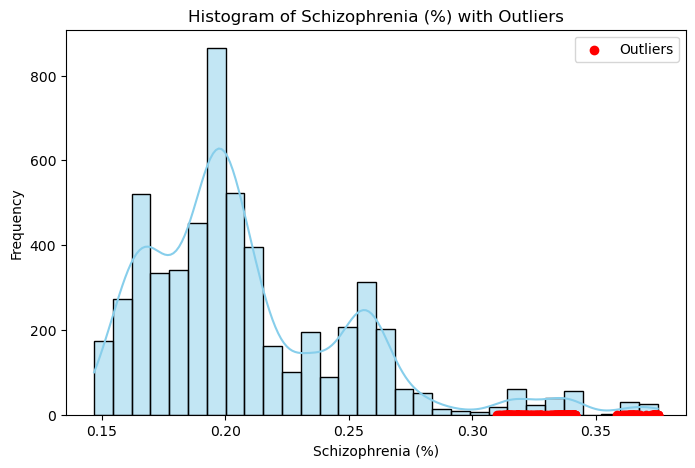

Saved histogram as bipolar_disorder_histogram_with_outliers.png


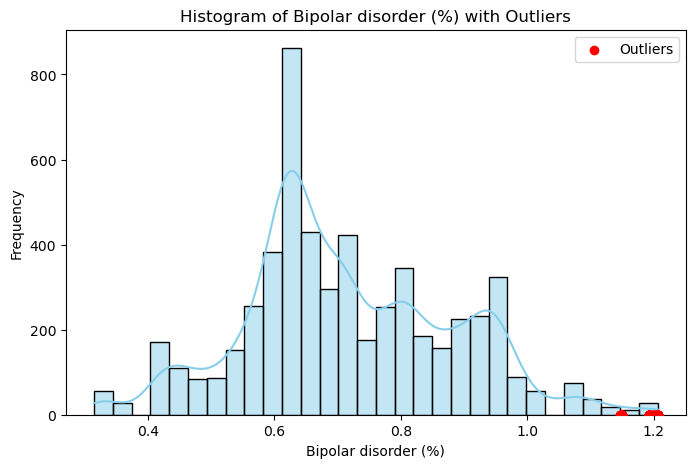

Saved histogram as eating_disorders_histogram_with_outliers.png


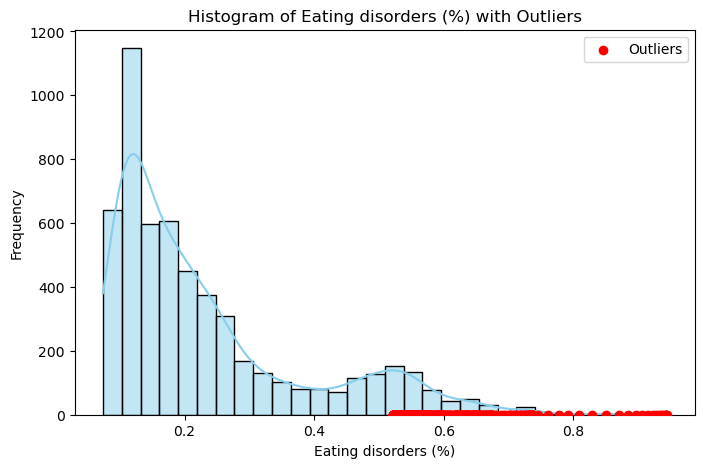

Saved histogram as anxiety_disorders_histogram_with_outliers.png


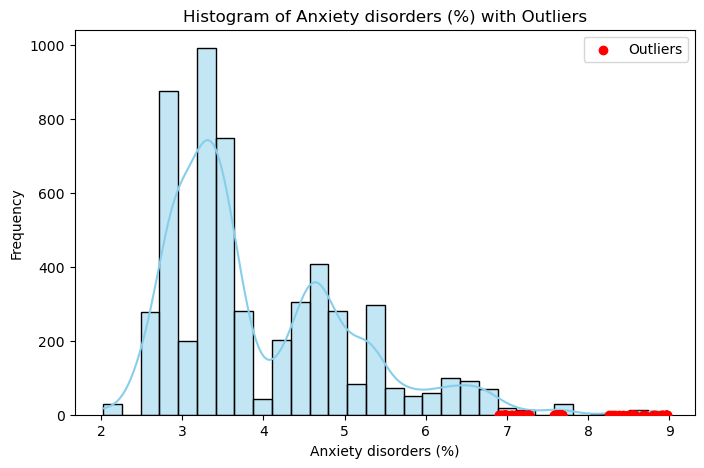

Saved histogram as drug_use_disorders_histogram_with_outliers.png


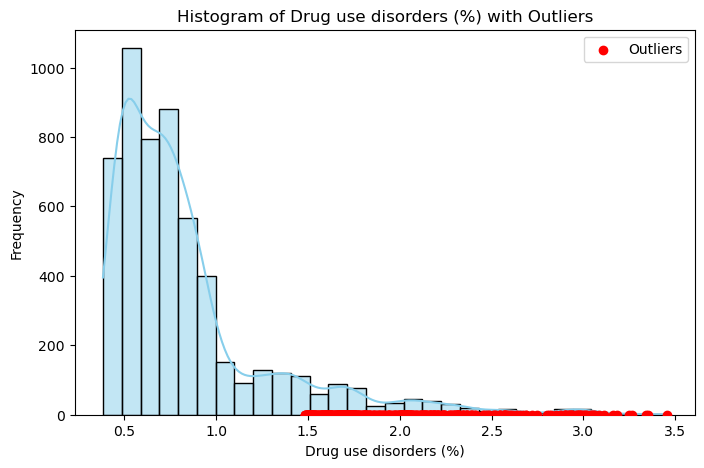

Saved histogram as depression_histogram_with_outliers.png


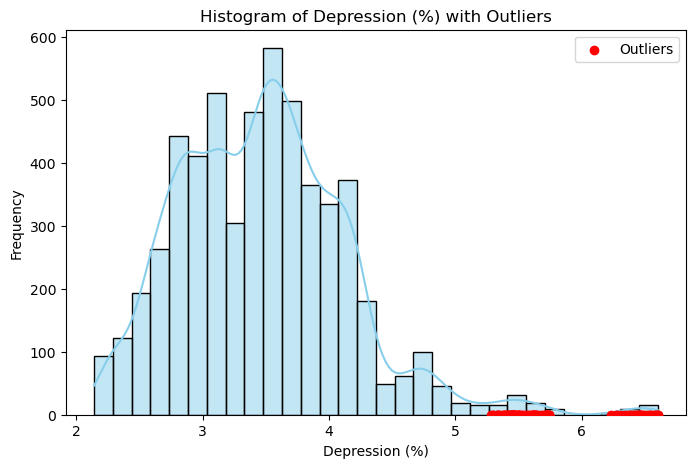

Saved histogram as alcohol_use_disorders_histogram_with_outliers.png


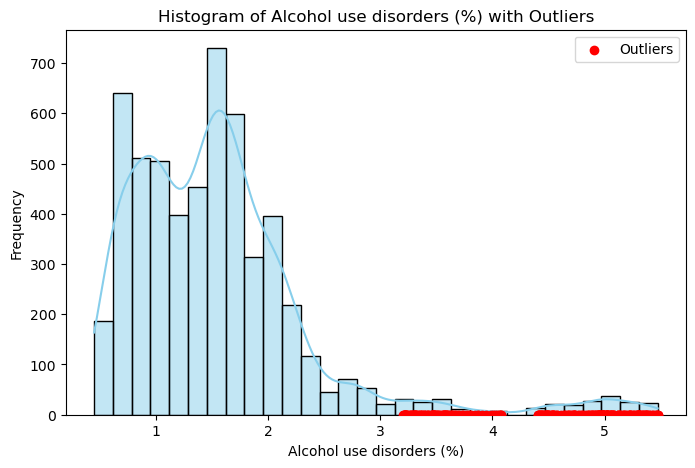

In [51]:
# List of mental health disorder columns 
variables = [
    'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 
    'Anxiety disorders (%)', 'Drug use disorders (%)', 
    'Depression (%)', 'Alcohol use disorders (%)'
]

# Function to detect outliers using IQR
def detect_outliers(data):
    # Calculate the IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Plot histograms for each variable and save each as an image, highlighting outliers
for var in variables:
    plt.figure(figsize=(8, 5))
    
    # Detect outliers
    outliers, lower_bound, upper_bound = detect_outliers(df[var])
    
    # Plot the histogram
    sns.histplot(df[var], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {var} with Outliers')
    plt.xlabel(f'{var}')
    plt.ylabel('Frequency')
    
    # Highlight outliers with red markers
    plt.scatter(outliers, np.zeros_like(outliers), color='red', label='Outliers', zorder=5)
    
    # Save each histogram as an image file (PNG format)
    filename = f"{var.replace(' (%)', '').replace(' ', '_').lower()}_histogram_with_outliers.png"
    plt.legend()
    plt.savefig(filename, format='png')
    print(f"Saved histogram as {filename}")
    
    # Display the histogram (optional)
    plt.show()

### c) PMF

Compare the country with the highest schizophrenia percentage with United States

In [54]:
# Find the country and year with the maximum schizophrenia percentage
max_schizophrenia = df.loc[df['Schizophrenia (%)'].idxmax()]

# Display the result
country_with_highest_schizophrenia = max_schizophrenia['Entity']
year_of_highest_schizophrenia = max_schizophrenia['Year']
highest_schizophrenia_rate = max_schizophrenia['Schizophrenia (%)']

print(f"The country with the highest schizophrenia prevalence is {country_with_highest_schizophrenia} "
      f"in the year {year_of_highest_schizophrenia} with a rate of {highest_schizophrenia_rate}%.")

The country with the highest schizophrenia prevalence is Netherlands in the year 2006 with a rate of 0.37511%.


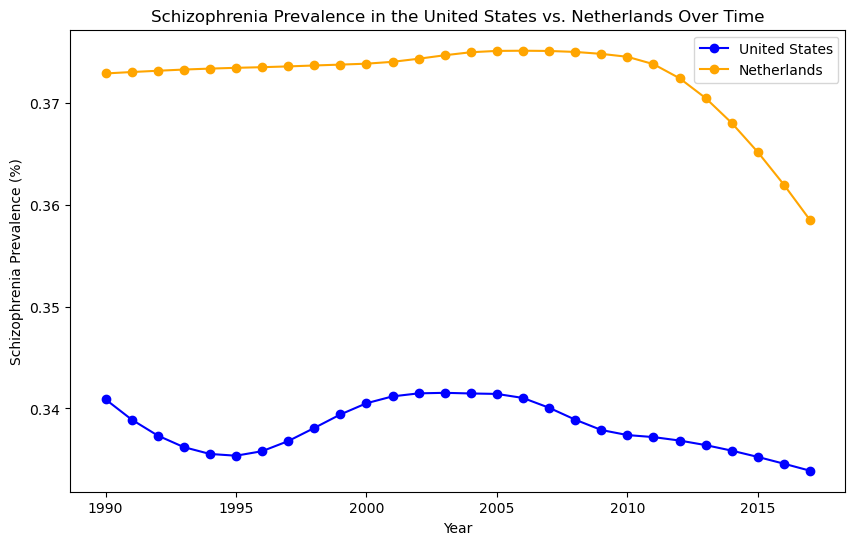

United States - Mean Schizophrenia Rate: 0.34%, Median: 0.34%
Netherlands - Mean Schizophrenia Rate: 0.37%, Median: 0.37%


In [55]:
# Filter the data for the United States and the Netherlands
us_data = df[df['Entity'] == 'United States']
nl_data = df[df['Entity'] == 'Netherlands']

# Plot schizophrenia prevalence over time for both countries
plt.figure(figsize=(10, 6))
plt.plot(us_data['Year'], us_data['Schizophrenia (%)'], label='United States', marker='o', color='blue')
plt.plot(nl_data['Year'], nl_data['Schizophrenia (%)'], label='Netherlands', marker='o', color='orange')

# Add titles and labels
plt.title('Schizophrenia Prevalence in the United States vs. Netherlands Over Time')
plt.xlabel('Year')
plt.ylabel('Schizophrenia Prevalence (%)')
plt.legend()
plt.show()

# Calculate and display summary statistics
us_mean = us_data['Schizophrenia (%)'].mean()
nl_mean = nl_data['Schizophrenia (%)'].mean()
us_median = us_data['Schizophrenia (%)'].median()
nl_median = nl_data['Schizophrenia (%)'].median()

print(f"United States - Mean Schizophrenia Rate: {us_mean:.2f}%, Median: {us_median:.2f}%")
print(f"Netherlands - Mean Schizophrenia Rate: {nl_mean:.2f}%, Median: {nl_median:.2f}%")

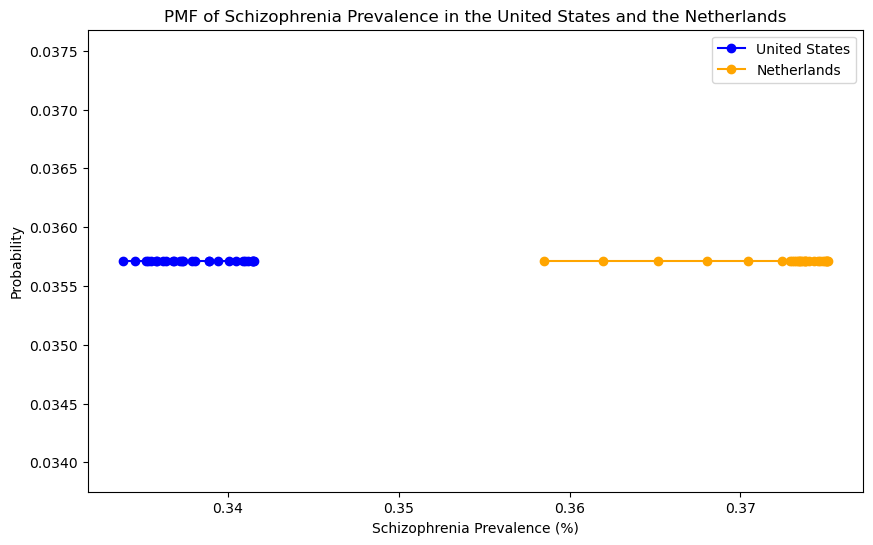

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the United States and the Netherlands
us_data = df[df['Entity'] == 'United States']
nl_data = df[df['Entity'] == 'Netherlands']

# Calculate the PMF for each country's schizophrenia prevalence
us_pmf = us_data['Schizophrenia (%)'].value_counts(normalize=True).sort_index()
nl_pmf = nl_data['Schizophrenia (%)'].value_counts(normalize=True).sort_index()

# Plot the PMFs
plt.figure(figsize=(10, 6))
plt.plot(us_pmf.index, us_pmf.values, marker='o', linestyle='-', color='blue', label='United States')
plt.plot(nl_pmf.index, nl_pmf.values, marker='o', linestyle='-', color='orange', label='Netherlands')

# Add labels and title
plt.title('PMF of Schizophrenia Prevalence in the United States and the Netherlands')
plt.xlabel('Schizophrenia Prevalence (%)')
plt.ylabel('Probability')
plt.legend()
plt.show()

### d) CDF

Here we look into depression prevelance globally. 

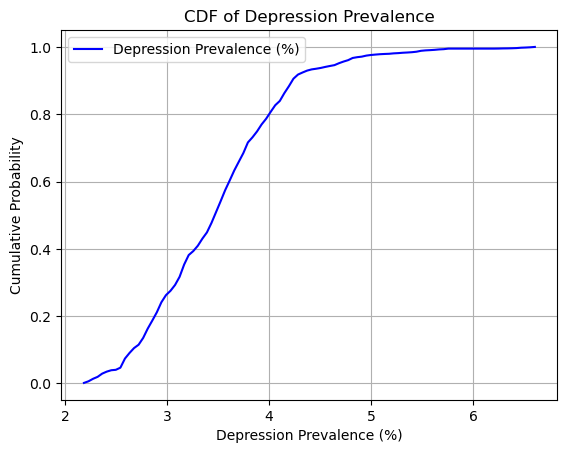

In [62]:
# Select the variable 'Depression (%)'
depression_data = df['Depression (%)'].dropna()

# Compute the cumulative frequency for depression prevalence
num_bins = 100  
cumulative_freqs, bin_edges = np.histogram(depression_data, bins=num_bins, density=True)
cdf = np.cumsum(cumulative_freqs) / np.sum(cumulative_freqs)

# Plot the CDF
plt.plot(bin_edges[1:], cdf, color='blue', label='Depression Prevalence (%)')
plt.xlabel('Depression Prevalence (%)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Depression Prevalence')
plt.grid()
plt.legend()
plt.show()


### e) Analytical Distribution

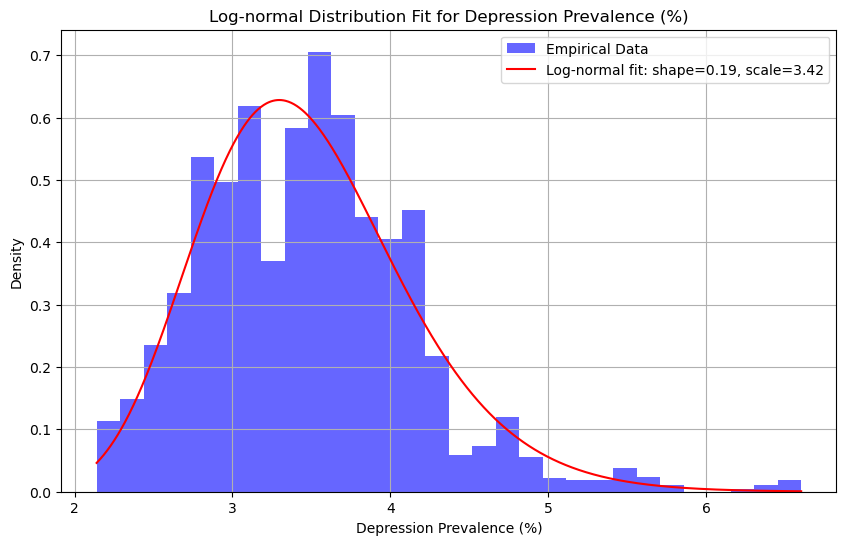

Log-normal fitting parameters:
Shape: 0.18916965070860237
Location: 0
Scale: 3.4168554592683904


In [65]:
# Plot histogram of the empirical data
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(depression_data, bins=30, density=True, alpha=0.6, color='blue', label='Empirical Data')

# Fit a log-normal distribution to the data
shape, loc, scale = stats.lognorm.fit(depression_data, floc=0)

# Generate points on the x-axis for plotting
x = np.linspace(min(depression_data), max(depression_data), 1000)

# Plot the PDF of the fitted log-normal distribution
pdf_fitted = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf_fitted, 'r-', label=f'Log-normal fit: shape={shape:.2f}, scale={scale:.2f}')

# Add plot settings
plt.title('Log-normal Distribution Fit for Depression Prevalence (%)')
plt.xlabel('Depression Prevalence (%)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Print fitting parameters
print(f'Log-normal fitting parameters:\nShape: {shape}\nLocation: {loc}\nScale: {scale}')

### f) Scatter Plot
Here we compare depression with drug use disorders and alcohol use disorders. 

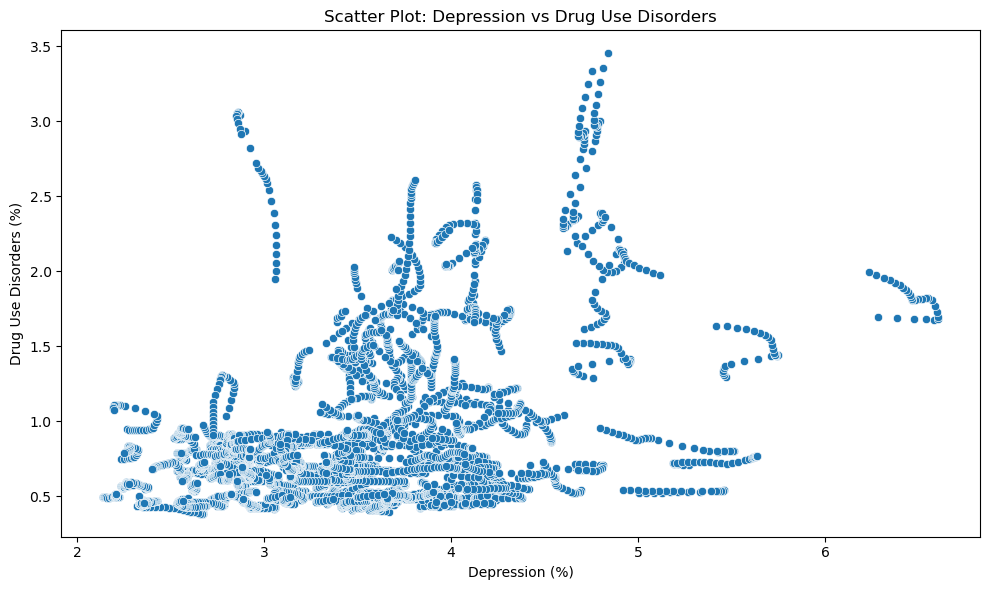

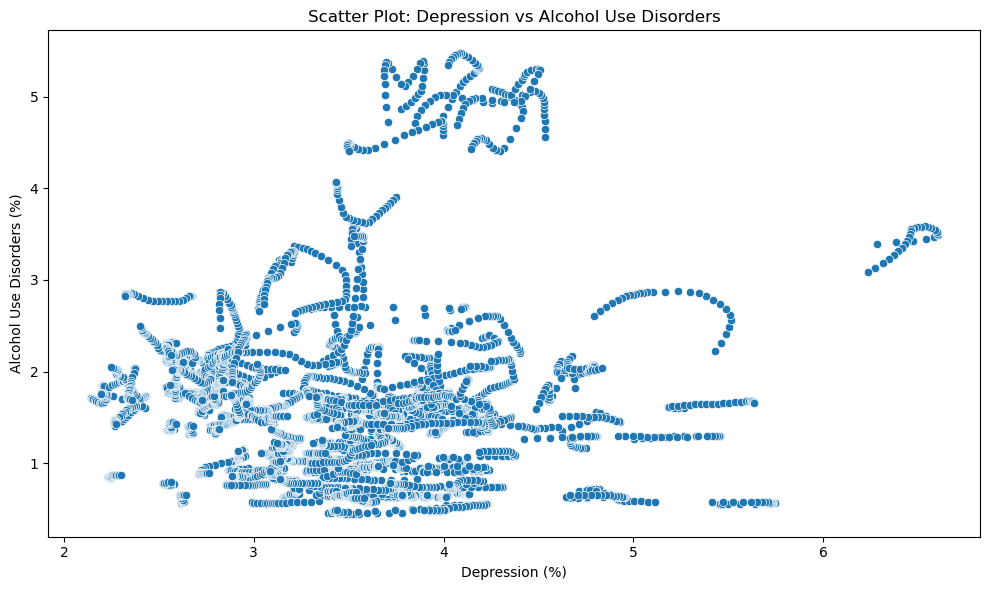

In [68]:
# Scatter plot comparing Depression with Drug use disorders
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Depression (%)'], y=df['Drug use disorders (%)'])
plt.title('Scatter Plot: Depression vs Drug Use Disorders')
plt.xlabel('Depression (%)')
plt.ylabel('Drug Use Disorders (%)')
plt.tight_layout()
plt.show()

# Scatter plot comparing Depression with Alcohol use disorders
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Depression (%)'], y=df['Alcohol use disorders (%)'])
plt.title('Scatter Plot: Depression vs Alcohol Use Disorders')
plt.xlabel('Depression (%)')
plt.ylabel('Alcohol Use Disorders (%)')
plt.tight_layout()
plt.show()

### g) Testing Hypothesis

In [71]:
# Get the unique values in the 'Entity' column
unique_entities = df['Entity'].unique()

# Print the unique values
print(unique_entities)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' '

#### i) Comparing by Healthcare Systems by Developed Countries (USA and Germany) 

In [74]:
import numpy as np

def permutation_test(data1, data2, iters=1000):
    """Performs a permutation test to compare the means of two datasets.

    data1: array-like, data for the first group (e.g., United States)
    data2: array-like, data for the second group (e.g., Germany)
    iters: number of permutations to run
    """
    observed_diff = np.abs(np.mean(data1) - np.mean(data2))  # Observed difference in means
    
    combined = np.concatenate([data1, data2])  # Combine both datasets
    perm_diffs = []
    
    for _ in range(iters):
        np.random.shuffle(combined)  # Shuffle the combined dataset
        new_data1 = combined[:len(data1)]  # Split shuffled data
        new_data2 = combined[len(data1):]
        perm_diffs.append(np.abs(np.mean(new_data1) - np.mean(new_data2)))  # Store the permuted difference
    
    p_value = np.mean(np.array(perm_diffs) >= observed_diff)  # Compute the p-value
    return p_value


def RunTests(df, iters=1000):
    """Runs the tests comparing entities (countries) on various mental health variables.

    df: DataFrame containing mental health data by entity (country)
    iters: number of iterations to run for permutation tests
    """
    variables = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 
                 'Anxiety disorders (%)', 'Drug use disorders (%)', 
                 'Depression (%)', 'Alcohol use disorders (%)']

    entities = df['Entity'].unique()  # Assuming 'Entity' is a column in the dataset representing countries

    for var in variables:
        # Check if both United States and Germany are in the dataset
        if 'United States' in entities and 'Germany' in entities:
            # Get the data for the selected variable
            entity_1_data = df[df['Entity'] == 'United States'][var].dropna()
            entity_2_data = df[df['Entity'] == 'Germany'][var].dropna()

            # Ensure there is data for both entities
            if len(entity_1_data) > 0 and len(entity_2_data) > 0:
                # Perform the permutation test
                p_value = permutation_test(entity_1_data.values, entity_2_data.values, iters)
                print(f'{var}: p-value between United States and Germany = {p_value:.4f}')
            else:
                print(f'{var}: Insufficient data for United States and Germany comparison')
        else:
            print(f'{var}: One or both entities (United States, Germany) are missing in the data')

# Example of how to use this function:
# Assume `df` is your DataFrame containing the mental health data with an 'Entity' column representing countries
RunTests(df, iters=1000)

Schizophrenia (%): p-value between United States and Germany = 0.0000
Bipolar disorder (%): p-value between United States and Germany = 0.0000
Eating disorders (%): p-value between United States and Germany = 0.0020
Anxiety disorders (%): p-value between United States and Germany = 0.0030
Drug use disorders (%): p-value between United States and Germany = 0.0000
Depression (%): p-value between United States and Germany = 0.0000
Alcohol use disorders (%): p-value between United States and Germany = 0.3850


### h) Regression Analysis for most developed and least developed countries
- Depression (%): Dependent variable 
- Entity: Categorical variable (countries/regions).
- Alcohol use disorders (%), Drug use disorders (%), : Numerical predictors.

=== Separate Regression Models for Each Entity ===

Results for Australia:
                            OLS Regression Results                            
Dep. Variable:     Depression_Percent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                   0.03230
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.859
Time:                        22:13:10   Log-Likelihood:                 29.008
No. Observations:                  28   AIC:                            -54.02
Df Residuals:                      26   BIC:                            -51.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

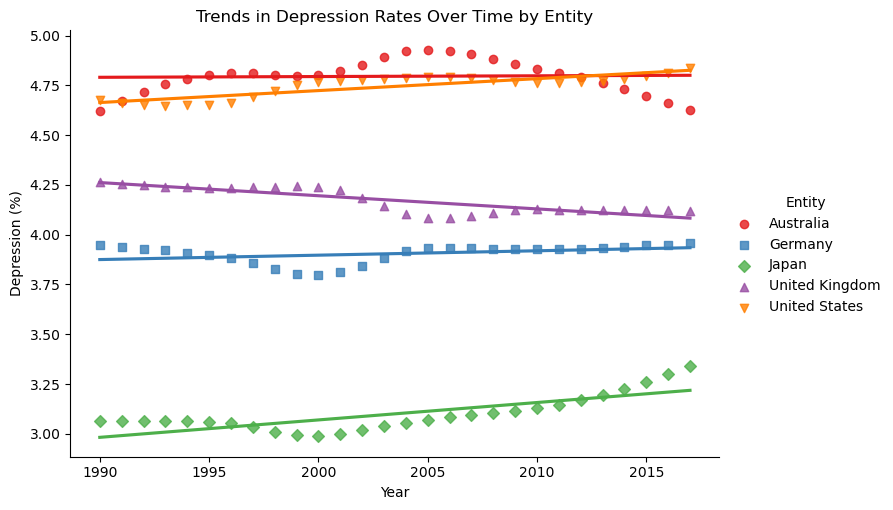

In [77]:
# Rename 'Depression (%)' column to 'Depression_Percent'
df.rename(columns={'Depression (%)': 'Depression_Percent'}, inplace=True)

# Filter the DataFrame to include only the entities of interest
entities_of_interest = ['United States', 'Germany', 'Japan', 'United Kingdom', 'Australia']
df_filtered = df[df['Entity'].isin(entities_of_interest)]

# Separate Models for Each Entity 
entities = df_filtered['Entity'].unique()
print("=== Separate Regression Models for Each Entity ===")
for entity in entities:
    entity_df = df_filtered[df_filtered['Entity'] == entity]
    model = smf.ols(formula='Depression_Percent ~ Year', data=entity_df).fit()
    print(f"\nResults for {entity}:")
    print(model.summary())

# Create Visualization
sns.lmplot(
    data=df_filtered,
    x='Year', y='Depression_Percent', hue='Entity',
    aspect=1.5, ci=None, markers=['o', 's', 'D', '^', 'v'],
    palette='Set1'
)
plt.title("Trends in Depression Rates Over Time by Entity")
plt.xlabel("Year")
plt.ylabel("Depression (%)")
plt.show()

=== Separate Regression Models for Each Entity ===

Results for Afghanistan:
                            OLS Regression Results                            
Dep. Variable:     Depression_Percent   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.50e-11
Time:                        22:13:20   Log-Likelihood:                 98.653
No. Observations:                  28   AIC:                            -193.3
Df Residuals:                      26   BIC:                            -190.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

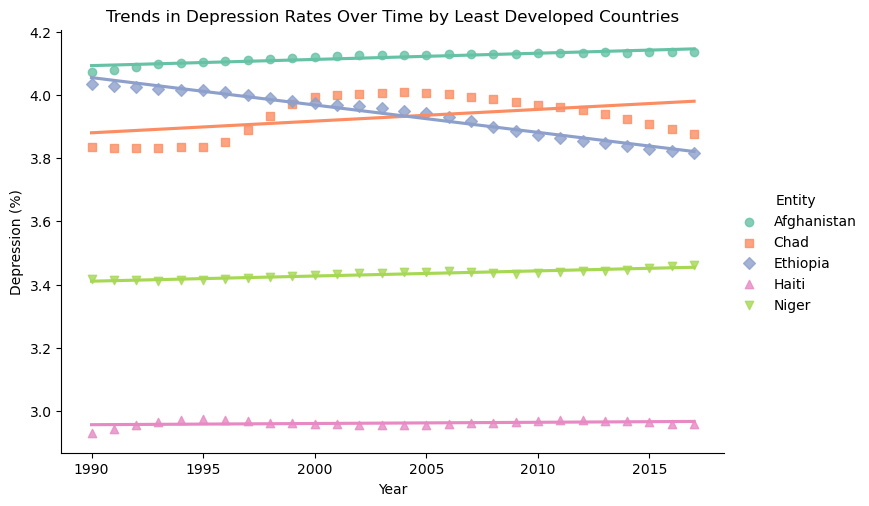

In [79]:
# Filter the DataFrame to include only the least developed countries
least_developed_countries = ['Afghanistan', 'Haiti', 'Ethiopia', 'Chad', 'Niger']
df_filtered = df[df['Entity'].isin(least_developed_countries)]

entities = df_filtered['Entity'].unique()
print("=== Separate Regression Models for Each Entity ===")
for entity in entities:
    entity_df = df_filtered[df_filtered['Entity'] == entity]
    model = smf.ols(formula='Depression_Percent ~ Year', data=entity_df).fit()
    print(f"\nResults for {entity}:")
    print(model.summary())

# --- Visualization ---
sns.lmplot(
    data=df_filtered,
    x='Year', y='Depression_Percent', hue='Entity',
    aspect=1.5, ci=None, markers=['o', 's', 'D', '^', 'v'],
    palette='Set2'  # Use a different color palette for better distinction
)
plt.title("Trends in Depression Rates Over Time by Least Developed Countries")
plt.xlabel("Year")
plt.ylabel("Depression (%)")
plt.show()

# Summary of Findings

The analysis of mental health disorder rates across countries reveals significant variability, supporting the hypothesis that factors such as socioeconomic conditions, healthcare access, and cultural attitudes contribute to differing prevalence rates. Key findings suggest schizophrenia rates remain relatively stable over time, with the Netherlands showing a marginally higher prevalence than the United States. Depression rates exhibit a positive skew, with most countries experiencing moderate levels, but a few, particularly developed nations, show significantly higher rates.

The cumulative distribution function (CDF) highlights a range of 2% to 6% in global depression prevalence, with a steep slope between 3% and 4%, indicating a significant proportion of the population is affected in this range. Beyond 4.5%, the curve flattens, suggesting few observations at higher prevalence rates. A rightward shift in the curve over time may indicate gradual increases in mental health disorder rates globally.

The relationship between depression and substance use disorders shows that lower depression rates often correlate with lower substance use, though this relationship weakens as depression rates rise. Statistical analysis reveals significant differences in mental health disorder rates between countries, with low p-values indicating these differences are unlikely due to chance. However, for alcohol use disorders, a p-value of 0.3890 suggests insufficient evidence for a difference.

Improvements to the analysis could include variables related to healthcare access, such as the number of mental health professionals per capita and treatment availability, to better assess their impact. Additionally, cultural attitudes, which strongly influence diagnosis and treatment-seeking behavior, were not factored in but could play a significant role in understanding country-specific patterns.

Certain assumptions, such as the stability of disorder rates over time, may overlook factors like shifts in healthcare policies, changes in reporting methods, or growing awareness and de-stigmatization of mental health. These dynamics could influence trends and warrant further exploration.

A key challenge was managing outliers, retained due to their potential impact on results. Determining their true influence was difficult, as some outliers might reflect data collection or reporting discrepancies rather than legitimate variance. While the relationship between depression and substance use was explored, the analysis did not examine interactions between different mental health disorders, which could provide insights into co-occurring conditions.

In conclusion, the variability observed across countries emphasizes the importance of tailoring mental health policies to specific cultural, socioeconomic, and healthcare contexts. Further investigation is needed to understand the factors influencing trends over time and the complexities of interactions between mental health conditions. 